In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
municipals = []
with open('../municipals.txt', 'r') as f:
    for line in f:
        if line.strip():
            municipals.append(line.strip())

In [3]:
# Getting the ARIMA MAE results for each
sum_pred_local_df = pd.DataFrame()
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        df = pd.read_csv(f'../ARIMA/output/Municipal/CSV/{municipal}/predictions_{i}_week_ahead.csv')
        df['Week'] = i
        sum_pred_local_df = pd.concat([sum_pred_local_df, df])
#group by week then date then sum
sum_pred_local_df = sum_pred_local_df.groupby(['Week', 'Date']).sum().reset_index()
sum_pred_local_df["Date"] = pd.to_datetime(sum_pred_local_df["Date"], format="%Y-%m-%d")
sum_pred_local_df
evaluations_mae = []
evaluations_rmse = []
for n in range(1,13):
    evaluations_mae.append(mean_absolute_error(sum_pred_local_df[sum_pred_local_df["Week"] == n]["actual"], sum_pred_local_df[sum_pred_local_df["Week"] == n]["predictions"]))
    evaluations_rmse.append(np.sqrt(mean_squared_error(sum_pred_local_df[sum_pred_local_df["Week"] == n]["actual"], sum_pred_local_df[sum_pred_local_df["Week"] == n]["predictions"])))
evaluations_arima = pd.DataFrame({'Week': [1,2,3,4,5,6,7,8,9,10,11,12], 'MAE': evaluations_mae, 'RMSE': evaluations_rmse})
evaluations_arima

,Week,MAE,RMSE
0,1,37.219703,77.398443
1,2,56.978273,122.045777
2,3,75.389303,165.014502
3,4,90.958690,197.576512
4,5,103.512266,224.415390
5,6,113.985417,243.111613
6,7,120.692905,256.192566
7,8,125.829727,264.835230
8,9,130.120298,271.042210
9,10,134.211186,274.634658


In [4]:
evaluations_arima[(evaluations_arima["Week"] == 2) & (evaluations_arima["MAE"] == 0)]

,Week,MAE,RMSE


In [5]:
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        df = pd.read_csv(f'output/Municipal/CSV/{municipal}/predictions_{i}_week_ahead.csv')
        df['Week'] = i
        sum_pred_local_df = pd.concat([sum_pred_local_df, df])
#group by week then date then sum
sum_pred_local_df = sum_pred_local_df.groupby(['Week', 'Date']).sum().reset_index()
sum_pred_local_df["Date"] = pd.to_datetime(sum_pred_local_df["Date"], format="%Y-%m-%d")
sum_pred_local_df
evaluations_mae = []
evaluations_rmse = []
for n in range(1,13):
    evaluations_mae.append(mean_absolute_error(sum_pred_local_df[sum_pred_local_df["Week"] == n]["actual"], sum_pred_local_df[sum_pred_local_df["Week"] == n]["predictions"]))
    evaluations_rmse.append(np.sqrt(mean_squared_error(sum_pred_local_df[sum_pred_local_df["Week"] == n]["actual"], sum_pred_local_df[sum_pred_local_df["Week"] == n]["predictions"])))
evaluations_rf_local = pd.DataFrame({'Week': [1,2,3,4,5,6,7,8,9,10,11,12], 'MAE': evaluations_mae, 'RMSE': evaluations_rmse})
evaluations_rf_local

,Week,MAE,RMSE
0,1,34.874275,67.307738
1,2,51.705483,101.226442
2,3,67.757152,139.273333
3,4,87.070691,185.357227
4,5,100.982095,218.979833
5,6,109.872516,236.666571
6,7,116.870491,252.712826
7,8,120.261018,257.278758
8,9,124.319764,264.011777
9,10,125.946939,264.881245


In [6]:
#Get RMAE of each
rel_evaluations_local_rf = pd.DataFrame()
for n in range(1,13):
    RMAE = evaluations_rf_local[evaluations_rf_local['Week'] == n]['MAE'].values[0]/evaluations_arima[evaluations_arima['Week'] == n]['MAE'].values[0]
    RRMSE = evaluations_rf_local[evaluations_rf_local['Week'] == n]['RMSE'].values[0]/evaluations_arima[evaluations_arima['Week'] == n]['RMSE'].values[0]
    rel_evaluations_local_rf = pd.concat([rel_evaluations_local_rf, pd.DataFrame({'Week': [n], 'RMAE_local': [RMAE], 'RRMSE_local': [RRMSE]})])
rel_evaluations_local_rf = rel_evaluations_local_rf.reset_index(drop=True)
rel_evaluations_local_rf

,Week,RMAE_local,RRMSE_local
0,1,0.936984,0.869627
1,2,0.907460,0.829414
2,3,0.898763,0.844007
3,4,0.957255,0.938154
4,5,0.975557,0.975779
5,6,0.963917,0.973489
6,7,0.968329,0.986417
7,8,0.955744,0.971467
8,9,0.955422,0.974061
9,10,0.938424,0.964486


In [7]:
sum_pred_prov_df = pd.DataFrame()
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        df = pd.read_csv(f'output/Municipal/CSV/{municipal}/predictions_{i}_week_ahead.csv')
        df['Week'] = i
        sum_pred_prov_df = pd.concat([sum_pred_prov_df, df])
#group by week then date then sum
sum_pred_prov_df = sum_pred_prov_df.groupby(['Week', 'Date']).sum().reset_index()
sum_pred_prov_df["Date"] = pd.to_datetime(sum_pred_local_df["Date"], format="%Y-%m-%d")
evaluations_mae = []
evaluations_rmse = []
for n in range(1,13):
    evaluations_mae.append(mean_absolute_error(sum_pred_prov_df[sum_pred_prov_df["Week"] == n]["actual"], sum_pred_prov_df[sum_pred_prov_df["Week"] == n]["predictions"]))
    evaluations_rmse.append(np.sqrt(mean_squared_error(sum_pred_prov_df[sum_pred_prov_df["Week"] == n]["actual"], sum_pred_prov_df[sum_pred_prov_df["Week"] == n]["predictions"])))
print(len(evaluations_mae))
print(len(evaluations_rmse))
evaluations_rf_provincial = pd.DataFrame({'Week': [1,2,3,4,5,6,7,8,9,10,11,12], 'MAE': evaluations_mae, 'RMSE': evaluations_rmse})
evaluations_rf_provincial

12
12


,Week,MAE,RMSE
0,1,32.528846,55.408882
1,2,46.432692,74.822546
2,3,60.125000,107.537605
3,4,83.182692,172.273402
4,5,98.451923,213.405875
5,6,105.759615,230.041029
6,7,113.048077,249.184497
7,8,114.692308,249.493525
8,9,118.519231,256.788936
9,10,117.682692,254.754690


In [25]:
evaluations_arima_agg = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    for municipal in municipals:
        df = pd.read_csv(f'../ARIMA/output/Municipal/CSV/{municipal}/evaluation_{i}_week_ahead.csv')
        df['Week'] = i
        df['Municipal'] = municipal
        df['RMSE'] = np.sqrt(df['MSE'])
        evaluations_arima_agg = pd.concat([evaluations_arima_agg, df])
        
evaluations_arima_agg

,n_week_ahead,MSE,MAE,Week,Municipal,RMSE
0,1,1.154491,0.751818,1,Ajuy,1.074472
0,1,0.290364,0.310934,1,Alimodian,0.538854
0,1,0.401857,0.331242,1,Anilao,0.633922
0,1,2.199150,0.962663,1,Badiangan,1.482953
0,1,1.637989,0.824464,1,Balasan,1.279839
...,...,...,...,...,...,...
0,12,38.361494,3.744557,12,Santa Barbara,6.193666
0,12,13.891304,2.478498,12,Sara,3.727104
0,12,33.576647,2.837269,12,Tigbauan,5.794536
0,12,1.751414,0.776443,12,Tubungan,1.323410


In [26]:
evaluations_rf_local_agg = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    for municipal in municipals:
        df = pd.read_csv(f'output/Municipal/CSV/{municipal}/evaluation_{i}_week_ahead.csv')
        df['Week'] = i
        df['Municipal'] = municipal
        df['RMSE'] = np.sqrt(df['MSE'])
        evaluations_rf_local_agg = pd.concat([evaluations_rf_local_agg, df])
evaluations_rf_local_agg['RMAE'] = evaluations_rf_local_agg['MAE'] / evaluations_arima_agg['MAE']
evaluations_rf_local_agg['RRMSE'] = evaluations_rf_local_agg['RMSE'] / evaluations_arima_agg['RMSE']
evaluations_rf_local_agg

,n_week_ahead,MSE,MAE,Week,Municipal,RMSE,RMAE,RRMSE
0,1,5.855769,1.509615,1,Ajuy,2.419870,2.007952,2.252147
0,1,11.682692,1.721154,1,Alimodian,3.417995,5.535430,6.343077
0,1,5.423077,1.173077,1,Anilao,2.328750,3.541453,3.673558
0,1,7.557692,1.769231,1,Badiangan,2.749126,1.837851,1.853818
0,1,7.192308,1.615385,1,Balasan,2.681848,1.959315,2.095457
...,...,...,...,...,...,...,...,...
0,12,29.365385,3.096154,12,Santa Barbara,5.418984,0.826841,0.874924
0,12,50.826923,3.961538,12,Sara,7.129300,1.598363,1.912826
0,12,29.951923,2.913462,12,Tigbauan,5.472835,1.026854,0.944482
0,12,26.028846,3.471154,12,Tubungan,5.101847,4.470585,3.855076


In [41]:
evaluations_rf_provincial_agg = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    for municipal in municipals:
        df = pd.read_csv(f'output/Provincial/CSV/{municipal}/evaluation_{i}_week_ahead.csv')
        df['Week'] = i
        df['Municipal'] = municipal
        df['RMSE'] = np.sqrt(df['MSE'])
        evaluations_rf_provincial_agg = pd.concat([evaluations_rf_provincial_agg, df])
evaluations_rf_provincial_agg['RMAE'] = evaluations_rf_provincial_agg['MAE'] / evaluations_arima_agg['MAE']
evaluations_rf_provincial_agg['RRMSE'] = evaluations_rf_provincial_agg['RMSE'] / evaluations_arima_agg['RMSE']
evaluations_rf_provincial_agg

,n_week_ahead,MSE,MAE,Week,Municipal,RMSE,RMAE,RRMSE
0,1,7.480769,1.692308,1,Ajuy,2.735099,2.250953,2.545528
0,1,10.298077,1.605769,1,Alimodian,3.209062,5.164340,5.955340
0,1,18.250000,1.730769,1,Anilao,4.272002,5.225095,6.738999
0,1,15.173077,2.115385,1,Badiangan,3.895263,2.197431,2.626693
0,1,5.403846,1.480769,1,Balasan,2.324617,1.796039,1.816335
...,...,...,...,...,...,...,...,...
0,12,94.048077,5.182692,12,Santa Barbara,9.697839,1.384060,1.565767
0,12,67.105769,4.740385,12,Sara,8.191811,1.912604,2.197902
0,12,65.375000,4.548077,12,Tigbauan,8.085481,1.602977,1.395363
0,12,8.913462,1.913462,12,Tubungan,2.985542,2.464395,2.255946


In [56]:
import seaborn as sns
merged_df = pd.merge(evaluations_rf_local_agg, evaluations_rf_provincial_agg, on=['Week','Municipal', 'n_week_ahead'], suffixes=('_local', '_provincial'))
# only get week = 1,4,8,12
#merged_df = merged_df[merged_df['Week'].isin([1,4,8,12])]
merged_df = merged_df[["Municipal", "Week", "n_week_ahead", "RMAE_local", "RMAE_provincial", "RRMSE_local", 'RRMSE_provincial']]
merged_df.to_csv("rf_merged_eval.csv", index = False)


In [43]:
# RMAE with ARIMA

# Merge the aggregated dataframes
merged_df_agg = pd.merge(evaluations_arima_agg, evaluations_rf_local_agg, on='Week', suffixes=('_arima', '_local_rf'))
merged_df_agg = pd.merge(merged_df_agg, evaluations_rf_provincial, on='Week', suffixes=('', '_provincial_rf'))

In [44]:
merged_df_agg

,n_week_ahead_arima,MSE_arima,MAE_arima,Week,Municipal_arima,RMSE_arima,n_week_ahead_local_rf,MSE_local_rf,MAE_local_rf,Municipal_local_rf,RMSE_local_rf,RMAE,RRMSE,MAE,RMSE
0,1,1.154491,0.751818,1,Ajuy,1.074472,1,5.855769,1.509615,Ajuy,2.419870,2.007952,2.252147,32.528846,55.408882
1,1,1.154491,0.751818,1,Ajuy,1.074472,1,11.682692,1.721154,Alimodian,3.417995,5.535430,6.343077,32.528846,55.408882
2,1,1.154491,0.751818,1,Ajuy,1.074472,1,5.423077,1.173077,Anilao,2.328750,3.541453,3.673558,32.528846,55.408882
3,1,1.154491,0.751818,1,Ajuy,1.074472,1,7.557692,1.769231,Badiangan,2.749126,1.837851,1.853818,32.528846,55.408882
4,1,1.154491,0.751818,1,Ajuy,1.074472,1,7.192308,1.615385,Balasan,2.681848,1.959315,2.095457,32.528846,55.408882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12,6.943229,1.551588,12,Zarraga,2.635001,12,29.365385,3.096154,Santa Barbara,5.418984,0.826841,0.874924,113.278846,240.667042
23228,12,6.943229,1.551588,12,Zarraga,2.635001,12,50.826923,3.961538,Sara,7.129300,1.598363,1.912826,113.278846,240.667042
23229,12,6.943229,1.551588,12,Zarraga,2.635001,12,29.951923,2.913462,Tigbauan,5.472835,1.026854,0.944482,113.278846,240.667042
23230,12,6.943229,1.551588,12,Zarraga,2.635001,12,26.028846,3.471154,Tubungan,5.101847,4.470585,3.855076,113.278846,240.667042


In [12]:
rmae_evaluations_local_rf[rmae_evaluations_local_rf['Week']==2]["RMAE_local"].max()

inf

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your merged DataFrame is called merged_df
# Melt the DataFrame to long format
df_melted = merged_df.melt(
    id_vars=["Municipal", "Week"],
    value_vars=["RMAE_local", "RMAE_provincial"],
    var_name="Model",
    value_name="RMAE"
)

# Replace model names for clarity
df_melted["Model"] = df_melted["Model"].replace({
    "RMAE_local": "Local model",
    "RMAE_provincial": "Pooled Provincial model"
})

# Ensure Municipal is a categorical variable with proper ordering
df_melted["Municipal"] = pd.Categorical(
    df_melted["Municipal"],
    categories=sorted(df_melted["Municipal"].unique()),
    ordered=True
)

# Set up seaborn style
sns.set(style="whitegrid")

# Get unique weeks
weeks = df_melted["Week"].unique()

# Create a plot for each week
for week in weeks:
    # Filter data for the current week
    week_data = df_melted[df_melted["Week"] == week]

    # Create figure
    plt.figure(figsize=(12, 6))

    # Create bar plot
    ax = sns.barplot(
        data=week_data,
        x="Municipal",
        y="RMAE",
        hue="Model",
        palette={"Local model": "salmon", "Pooled Provincial model": "teal"},
        errorbar=None
    )

    # Customize plot
    plt.title(f"Random Forest RMAE Comparison - Week {week}")
    plt.xlabel("Municipality")
    plt.ylabel("Relative Mean Absolute Error (RMAE)")
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Save the plot
    filename = f"Random Forest week_{week}_rmae_plots.jpg".replace(" ", "_").lower()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your merged DataFrame is called merged_df
# Melt the DataFrame to long format
df_melted = merged_df.melt(
    id_vars=["Municipal", "Week"],
    value_vars=["RRMSE_local", "RRMSE_provincial"],
    var_name="Model",
    value_name="RRMSE"
)

# Replace model names for clarity
df_melted["Model"] = df_melted["Model"].replace({
    "RRMSE_local": "Local model",
    "RRMSE_provincial": "Pooled Provincial model"
})

# Ensure Municipal is a categorical variable with proper ordering
df_melted["Municipal"] = pd.Categorical(
    df_melted["Municipal"],
    categories=sorted(df_melted["Municipal"].unique()),
    ordered=True
)

# Set up seaborn style
sns.set(style="whitegrid")

# Get unique weeks
weeks = df_melted["Week"].unique()

# Create a plot for each week
for week in weeks:
    # Filter data for the current week
    week_data = df_melted[df_melted["Week"] == week]

    # Create figure
    plt.figure(figsize=(12, 6))

    # Create bar plot
    ax = sns.barplot(
        data=week_data,
        x="Municipal",
        y="RRMSE",
        hue="Model",
        palette={"Local model": "salmon", "Pooled Provincial model": "teal"},
        errorbar=None
    )

    # Customize plot
    plt.title(f"Random Forest RRMSE Comparison - Week {week}")
    plt.xlabel("Municipality")
    plt.ylabel("Relative Root Mean Squared Error (RRMSE)")
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Save the plot
    filename = f"Random Forest week_{week}_rrmse_plots.jpg".replace(" ", "_").lower()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()


In [40]:
evaluations_rf_local_pooled = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    for municipal in municipals:
        df = pd.read_csv(f'output/Provincial/CSV/{municipal}/evaluation_{i}_week_ahead.csv')
        df['Week'] = i
        df['Municipal'] = municipal
        df['RMSE'] = np.sqrt(df['MSE'])
        evaluations_rf_local_pooled = pd.concat([evaluations_rf_local_pooled, df])
evaluations_rf_local_pooled['RMAE'] = evaluations_rf_local_pooled['MAE'] / evaluations_arima_agg['MAE']
evaluations_rf_local_pooled['RRMSE'] = evaluations_rf_local_pooled['RMSE'] / evaluations_arima_agg['RMSE']
evaluations_rf_provincial_pooled = pd.DataFrame()
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    for municipal in municipals:
        df = pd.read_csv(f'output/Provincial/CSV/{municipal}/evaluation_{i}_week_ahead.csv')
        df['Week'] = i
        df['Municipal'] = municipal
        df['RMSE'] = np.sqrt(df['MSE'])
        evaluations_rf_provincial_pooled = pd.concat([evaluations_rf_provincial_pooled, df])
evaluations_rf_provincial_pooled['RMAE'] = evaluations_rf_provincial_pooled['MAE'] / evaluations_arima_agg['MAE']
evaluations_rf_provincial_pooled['RRMSE'] = evaluations_rf_provincial_pooled['RMSE'] / evaluations_arima_agg['RMSE']
merged_df_pooled = pd.merge(evaluations_arima_agg, evaluations_rf_local_pooled, on='Week', suffixes=('_arima', '_local_rf'))
merged_df_pooled

,n_week_ahead_arima,MSE_arima,MAE_arima,Week,Municipal_arima,RMSE_arima,n_week_ahead_local_rf,MSE_local_rf,MAE_local_rf,Municipal_local_rf,RMSE_local_rf,RMAE,RRMSE
0,1,1.154491,0.751818,1,Ajuy,1.074472,1,7.480769,1.692308,Ajuy,2.735099,2.250953,2.545528
1,1,1.154491,0.751818,1,Ajuy,1.074472,1,10.298077,1.605769,Alimodian,3.209062,5.164340,5.955340
2,1,1.154491,0.751818,1,Ajuy,1.074472,1,18.250000,1.730769,Anilao,4.272002,5.225095,6.738999
3,1,1.154491,0.751818,1,Ajuy,1.074472,1,15.173077,2.115385,Badiangan,3.895263,2.197431,2.626693
4,1,1.154491,0.751818,1,Ajuy,1.074472,1,5.403846,1.480769,Balasan,2.324617,1.796039,1.816335
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12,6.943229,1.551588,12,Zarraga,2.635001,12,94.048077,5.182692,Santa Barbara,9.697839,1.384060,1.565767
23228,12,6.943229,1.551588,12,Zarraga,2.635001,12,67.105769,4.740385,Sara,8.191811,1.912604,2.197902
23229,12,6.943229,1.551588,12,Zarraga,2.635001,12,65.375000,4.548077,Tigbauan,8.085481,1.602977,1.395363
23230,12,6.943229,1.551588,12,Zarraga,2.635001,12,8.913462,1.913462,Tubungan,2.985542,2.464395,2.255946


# Feature Importance

In [18]:
feature_imp_rf_local = pd.DataFrame()
for municipal in municipals:
    for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
        df = pd.read_csv(f'output/Municipal/CSV/{municipal}/feature_importance_{i}_week_ahead.csv')
        df['Municipal'] = municipal
        df['Week'] = i
        feature_imp_rf_local = pd.concat([feature_imp_rf_local, df])
feature_imp_rf_local = feature_imp_rf_local.reset_index(drop=True)
feature_imp_rf_local

,Feature,Importance,Municipal,Week
0,Cases_lag_1,0.776845,Ajuy,1
1,Cases_lag_2,0.114151,Ajuy,1
2,Temperature_lag_10,0.013541,Ajuy,1
3,Precipitation_lag_2,0.008860,Ajuy,1
4,Temperature_lag_8,0.006508,Ajuy,1
...,...,...,...,...
28375,Cases_lag_19,0.000992,Zarraga,12
28376,Cases_lag_15,0.000726,Zarraga,12
28377,Precipitation_lag_14,0.000638,Zarraga,12
28378,Temperature_lag_23,0.000370,Zarraga,12


In [19]:
ave_feature_imp_rf_local = feature_imp_rf_local.groupby(["Feature", "Week"])['Importance'].median().reset_index()
#Make Feature a categorical variable
ave_feature_imp_rf_local["Feature"] = pd.Categorical(ave_feature_imp_rf_local["Feature"], categories=sorted(ave_feature_imp_rf_local["Feature"].unique()), ordered=True)
ave_feature_imp_rf_local = ave_feature_imp_rf_local.sort_values(by=["Week", "Importance"], ascending=[True, False])
ave_feature_imp_rf_local

,Feature,Week,Importance
0,Cases_lag_1,1,0.690519
90,Cases_lag_2,1,0.114151
102,Cases_lag_3,1,0.022033
514,Temperature_lag_12,1,0.009660
627,Temperature_lag_9,1,0.005829
...,...,...,...
100,Cases_lag_22,12,0.002795
369,Precipitation_lag_12,12,0.002652
98,Cases_lag_21,12,0.001942
647,Week,12,0.001529


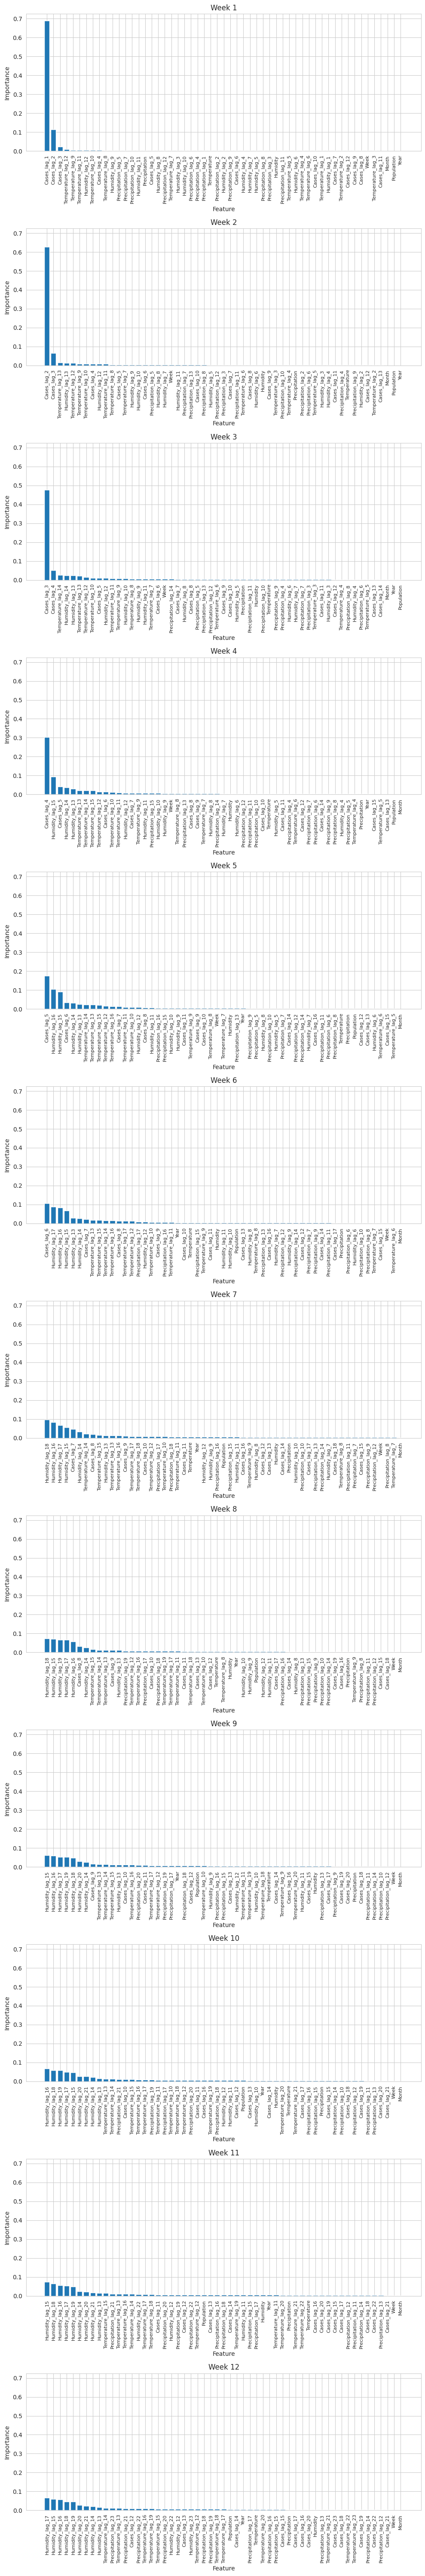

In [20]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Get unique weeks
weeks = ave_feature_imp_rf_local["Week"].unique()

# Set up the figure with 2 columns
n_cols = 1
n_rows = -(-len(weeks) // n_cols)  # Calculate the number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each week's data
for i, week in enumerate(weeks):
    # Filter data for the current week
    week_data = ave_feature_imp_rf_local[ave_feature_imp_rf_local["Week"] == week]

    # Plot bar chart
    axes[i].bar(week_data["Feature"], week_data["Importance"])

    # Set title and labels
    axes[i].set_title(f"Week {week}")
    axes[i].set_xlabel("Feature")
    axes[i].set_ylabel("Importance")

    # Rotate x-axis labels for better readability
    axes[i].set_xticks(range(len(week_data["Feature"])))
    axes[i].set_xticklabels(week_data["Feature"], rotation=90, ha='center', fontsize=8)

# Remove unused subplots
for j in range(len(weeks), len(axes)):
    fig.delaxes(axes[j])
# Adjust layout
plt.tight_layout()
plt.show()

## Leave One Season Out


In [17]:
import pandas as pd

leave_one_season_out_local_rf = pd.read_csv("leave_one_season_out_evaluation.csv")
leave_one_season_out_local_rf.head()

,Municipal,Year,MAE,MSE,N_week_ahead
0,Ajuy,2014,0.862069,1.482759,1
1,Ajuy,2015,0.884615,1.153846,1
2,Ajuy,2016,1.846154,8.307692,1
3,Ajuy,2017,0.884615,1.115385,1
4,Ajuy,2018,1.615385,5.730769,1


In [18]:
ave_leave_one_season_out_local_rf = leave_one_season_out_local_rf.groupby('N_week_ahead')["MAE"].median().reset_index()

In [19]:
ave_leave_one_season_out_local_rf

,N_week_ahead,MAE
0,1,0.980769
1,2,1.074176
2,3,1.115385
3,4,1.269231
4,5,1.384615
5,6,1.549679
6,7,1.711538
7,8,1.865385
8,9,2.000000
9,10,2.105769


In [20]:
# pooled
leave_one_season_out_provincial_rf = pd.read_csv("leave_one_season_out_pooled_evaluation.csv")
leave_one_season_out_provincial_rf.head()

,Municipal,Year,MAE,MSE,N_week_ahead
0,Ajuy,2014,0.829268,1.268293,1
1,Alimodian,2014,1.097561,3.878049,1
2,Anilao,2014,0.365854,0.512195,1
3,Badiangan,2014,0.195122,0.243902,1
4,Balasan,2014,1.560976,6.390244,1


In [21]:
ave_leave_one_season_out_provincial_rf = leave_one_season_out_provincial_rf.groupby('N_week_ahead')["MAE"].median().reset_index()

In [22]:
ave_leave_one_season_out_provincial_rf

,N_week_ahead,MAE
0,1,0.846154
1,2,0.934568
2,3,0.942308
3,4,1.043621
4,5,1.115385
5,6,1.219512
6,7,1.312383
7,8,1.472092
8,9,1.557692
9,10,1.865385
